# Visualising Financial Reports 

## Introduction 
This report will analyse and visualize financial ratios for given balance sheet and income sheet. To investigate which companies are profitable based on the profitability and leverage of companies from various industries.

In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns

# Read in the files
balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("data/Income_Statement.xlsx")

# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

### Profitability Ratio

In [3]:
# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# Also could compute operating margin ratio as the profitability ratio, but commenting it out
# df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

### Leverage Ratio

In [4]:
# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Also could Compute equity multiplier ratio as the leverage ratio, but commenting it out
# df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

### Analysis

In [5]:
# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062


Lowest profitatbility is fmcg and highest is tech. However, the differences were not distinct.

In [6]:
# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448


Highest leverage is real estate and lowest leverage is tech. Therefore, investigate the trends in real estate.

### Visualisation

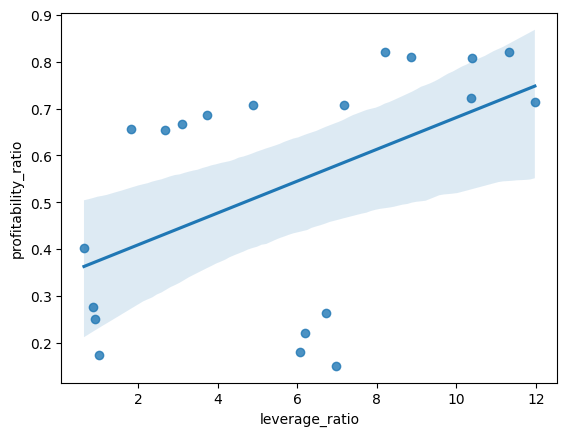

In [7]:
# Plot the leverage ratio on x-axis and profitability on y axis to see 
# if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")

Displays a positive relationship, hence, should investigate real estate companies.